### Package Versions

- **Python version**: `3.9.13`
- **NumPy version**: `1.23.5`
- **Matplotlib version**: `3.4.2`
- **SciPy version**: `1.9.1`
- **Pandas version**: `1.5.3`



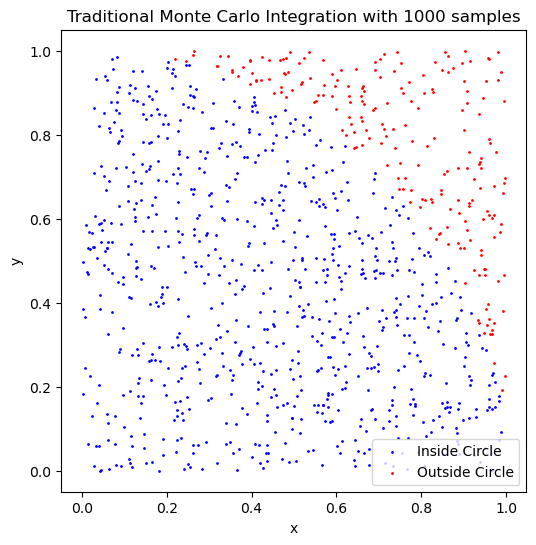

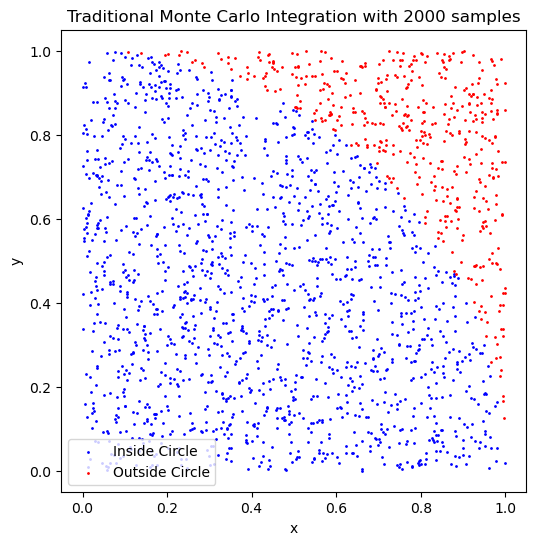

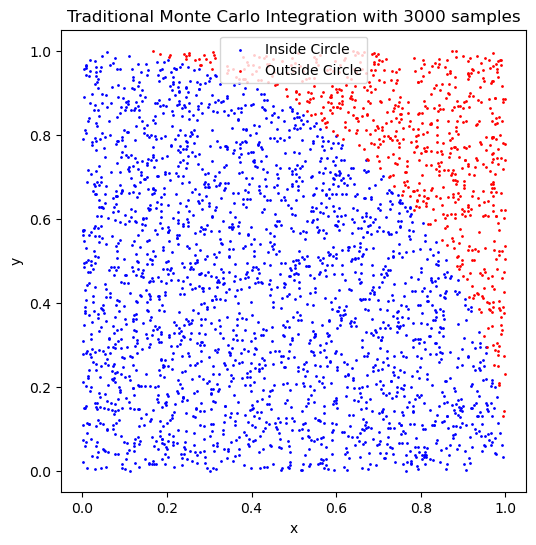

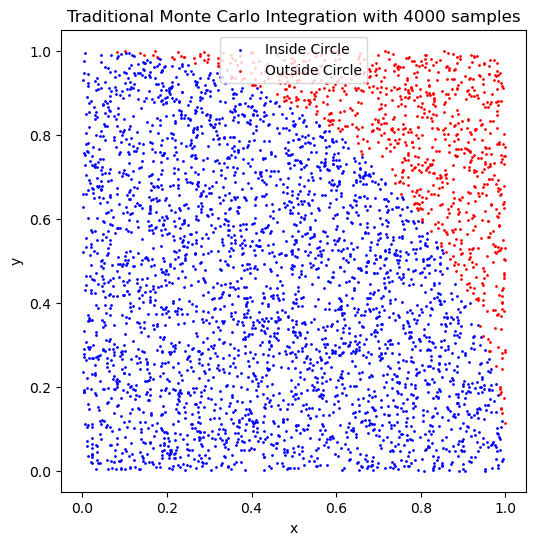

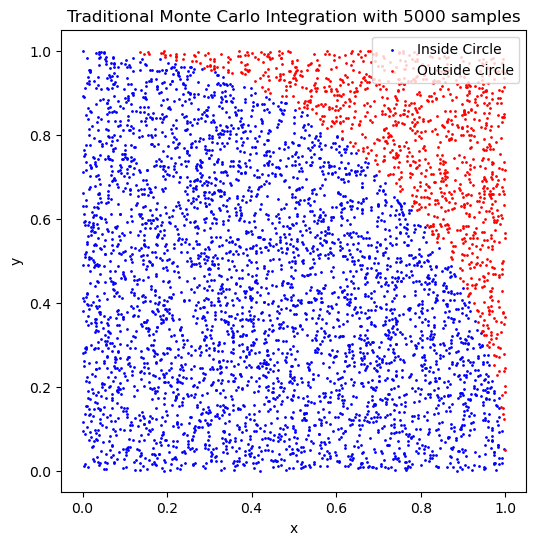

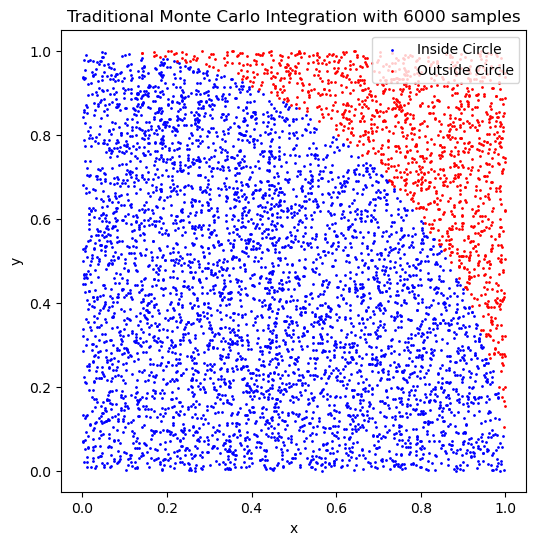

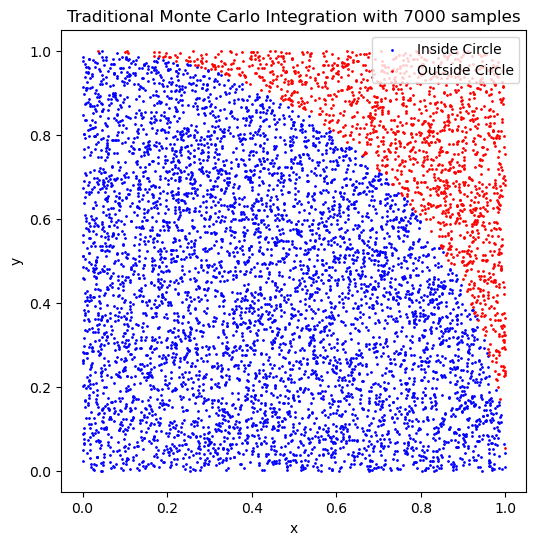

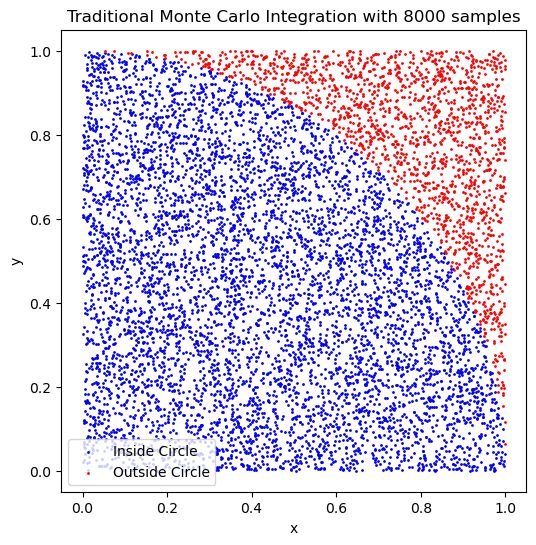

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Set target precision (0.1%)
target_precision = 0.001 * np.pi

# Traditional Monte Carlo Integration with Plot
def monte_carlo_integration_with_plot(samples):
    inside_x, inside_y = [], []
    outside_x, outside_y = [], []

    for _ in range(samples):
        x, y = np.random.uniform(0, 1, 2)
        if x**2 + y**2 <= 1:
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label="Inside Circle")
    plt.scatter(outside_x, outside_y, color='red', s=1, label="Outside Circle")
    plt.title(f"Traditional Monte Carlo Integration with {samples} samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    pi_estimate = 4 * len(inside_x) / samples
    return pi_estimate

# Running Traditional Monte Carlo Integration with Plot
samples = 1000
while True:
    pi_estimate = monte_carlo_integration_with_plot(samples)
    if abs(pi_estimate - np.pi) < target_precision:
        break
    samples += 1000





In [ ]:
# Hit-or-Miss Monte Carlo Method with Plot
def monte_carlo_hit_or_miss_with_plot(samples):
    inside_x, inside_y = [], []
    outside_x, outside_y = [], []

    for _ in range(samples):
        x, y = np.random.uniform(0, 1, 2)
        if x**2 + y**2 <= 1:
            inside_x.append(x)
            inside_y.append(y)
        else:
            outside_x.append(x)
            outside_y.append(y)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.scatter(inside_x, inside_y, color='blue', s=1, label="Inside Circle")
    plt.scatter(outside_x, outside_y, color='red', s=1, label="Outside Circle")
    plt.title(f"Hit-or-Miss Monte Carlo Method with {samples} samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.show()

    pi_estimate = 4 * len(inside_x) / samples
    return pi_estimate


print(f"Traditional Monte Carlo Method: π ≈ {pi_estimate} with {samples} samples")

# Running Hit-or-Miss Monte Carlo Method with Plot
samples = 1000
while True:
    pi_estimate = monte_carlo_hit_or_miss_with_plot(samples)
    if abs(pi_estimate - np.pi) < target_precision:
        break
    samples += 1000

print(f"Hit-or-Miss Monte Carlo Method: π ≈ {pi_estimate} with {samples} samples")